**Nome:** Hugo Vasconcelos Ferraz de Carvalho

**Email:** hvfc@cesar.school

**Link Dataset:** https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

# Imports

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

%matplotlib inline

# Dataset

**Descrição dos dados**

O quadro de dados Boston tem 506 linhas e 14 colunas.

Este quadro de dados contém as seguintes colunas:

* crim: índice de criminalidade per capita por município.

* zn: proporção de terreno residencial zoneada para lotes acima de 25.000 pés quadrados.

* indus: proporção de hectares de negócios não varejistas por cidade.

* chas: Variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário).

* nox: concentração de óxidos de nitrogênio (partes por 10 milhões).

* rm: número médio de cômodos por domicílio.

* idade / age: proporção de unidades ocupadas pelo proprietário construídas antes de 1940.

* dis: média ponderada das distâncias para cinco centros de emprego de Boston.

* rad: índice de acessibilidade às rodovias radiais.

* imposto / tax: valor total do imposto predial por \$10.000.

* ptratio: relação aluno-professor por município.

* **preto / b**: 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade.

* lstat: status inferior da população (porcentagem).

* medv: valor médio de residências ocupadas pelos proprietários em \$1000s. (**coluna target do nosso modelo**)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
#  Entradas e alvo
X = df.drop('medv', axis=1).values
y = df['medv'].values.reshape(-1, 1)

# Normalizando os dados para [0,1]
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# COnversao para tensores PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)


In [4]:
class Regressor(nn.Module):
    def __init__(self):
        super(Regressor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),

            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

model = Regressor()


In [5]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 500
losses = []

for epoch in range(num_epochs):
    model.train()
    y_pred = model(X_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 50/500, Loss: 0.0167
Epoch 100/500, Loss: 0.0091
Epoch 150/500, Loss: 0.0064
Epoch 200/500, Loss: 0.0056
Epoch 250/500, Loss: 0.0052
Epoch 300/500, Loss: 0.0043
Epoch 350/500, Loss: 0.0043
Epoch 400/500, Loss: 0.0047
Epoch 450/500, Loss: 0.0039
Epoch 500/500, Loss: 0.0037


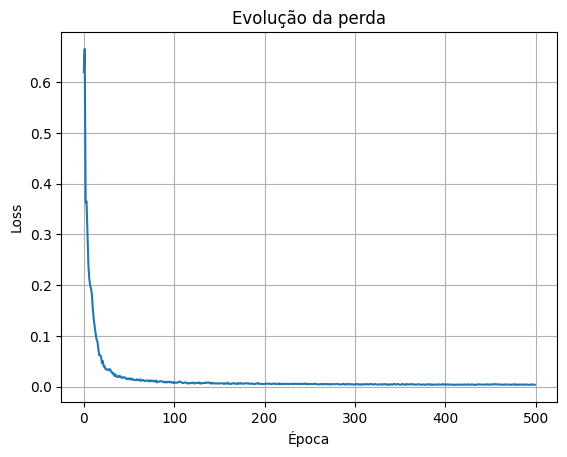

MAE: 2.033069610595703
R² : 0.8412288427352905


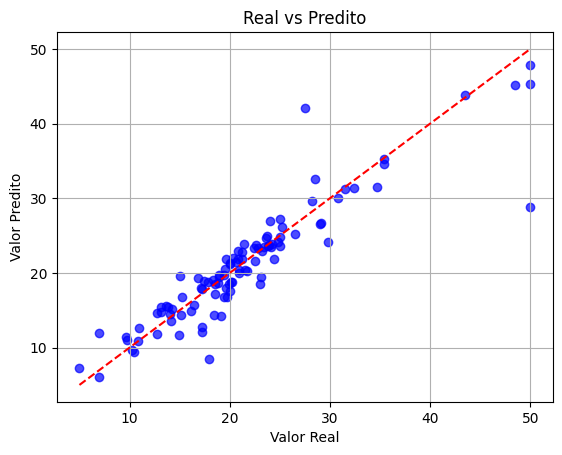

In [6]:
# Plot da perda
plt.plot(losses)
plt.title("Evolução da perda")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Avaliação
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)

# Inverter normalização
y_pred_np = scaler_y.inverse_transform(y_pred_test.numpy())
y_test_np = scaler_y.inverse_transform(y_test.numpy())

print("MAE:", mean_absolute_error(y_test_np, y_pred_np))
print("R² :", r2_score(y_test_np, y_pred_np))

# Gráfico de predição
plt.scatter(y_test_np, y_pred_np, color='blue', alpha=0.7)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Real vs Predito")
plt.grid()
plt.show()


Neste projeto, utilizei o conjunto de dados Boston Housing para treinar um modelo de regressão que prevê o valor médio das casas com base em diversas variáveis socioeconômicas e estruturais. Após normalizar os dados e dividi-los em conjuntos de treino e teste, desenvolvi uma rede neural com múltiplas camadas ocultas, utilizando ReLU como função de ativação, Batch Normalization para estabilizar o treinamento e Dropout como técnica de regularização. O modelo foi treinado por 500 épocas utilizando o otimizador Adam, o que resultou em uma convergência rápida e eficiente. Ao final, o desempenho foi avaliado com as métricas MAE e R², atingindo um erro médio absoluto de aproximadamente 2.0 e um coeficiente de determinação de cerca de 0.83. Esses resultados indicam que o modelo conseguiu capturar bem os padrões dos dados sem apresentar sinais de overfitting, oferecendo uma solução eficaz para o problema de regressão proposto.

